In [5]:
#Importing built-in python models necessary for the analysis
!pip install wordcloud
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import ast
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Training Data

In [6]:
#read training data

file_path = 'training.json'

data = []

with open(file_path, 'r') as file:
    for line in file:
        try:
            json_data = json.loads(line)
            data.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df = pd.DataFrame(data) #consider dataframe as df

if df is not None:
    print("Loaded DataFrame:")
    print(df.head())
else:
    print("DataFrame not loaded due to an error.")

df.head()

Loaded DataFrame:
                                                text  \
0  WTF, y'all never made MRE fart balloons in the...   
1  No apologies !! McCall has balls !  Ccp is not...   
2  What ever you need to tell yourself to sleep a...   
3                   @exZACKly @CBSNews Fuck off Nazi   
4  Texas is a republican sponsored killing ground...   

                                      parent_comment  \
0                                               None   
1                                               None   
2  I wonder how many undercover agents will be go...   
3  @NCmylo @CBSNews Lol.  Stop choosing to be an ...   
4                                               None   

                                       article_title  \
0  Triangular UFO hovers over California military...   
1  China sentences elderly US citizen to life in ...   
2  Jan. 6 defendant who put foot on desk in Pelos...   
3  19-year-old Missouri man arrested in U-Haul cr...   
4  At Least 8 Killed After D

text  \
0  WTF, y'all never made MRE fart balloons in the...   
1  No apologies !! McCall has balls !  Ccp is not...   
2  What ever you need to tell yourself to sleep a...   
3                   @exZACKly @CBSNews Fuck off Nazi   
4  Texas is a republican sponsored killing ground...   

                                      parent_comment  \
0                                               None   
1                                               None   
2  I wonder how many undercover agents will be go...   
3  @NCmylo @CBSNews Lol.  Stop choosing to be an ...   
4                                               None   

                                       article_title  \
0  Triangular UFO hovers over California military...   
1  China sentences elderly US citizen to life in ...   
2  Jan. 6 defendant who put foot on desk in Pelos...   
3  19-year-old Missouri man arrested in U-Haul cr...   
4  At Least 8 Killed After Driver Plows Car Into ...   

                                         article_url platform  \
0  https://www.dailymail.co.uk/news/article-12112...   reddit   
1  https://www.cnn.com/2023/05/15/china/china-jai...  youtube   
2  https://www.cbsnews.com/news/richard-barnett-j...  youtube   
3  https://www.cbsnews.com/news/u-haul-crash-lafa...  twitter   
4  https://www.nytimes.com/2023/05/07/us/car-pede...  youtube   

                                         platform_id  \
0                                            jlcm021   
1                         Ugws8gNW7eJyE9VHeM14AaABAg   
2  UgxHlqwNcVssLHUr4yF4AaABAg.9q7kOunSlu-9q7lHH4he6S   
3                                1661025155047637000   
4                         UgwpAfn9RIV0cHfhp4R4AaABAg   

                                     composite_toxic  
0  [[False, 74], [True, 323], [False, 1028], [Fal...  
1  [[False, 216], [False, 197], [False, 1039], [F...  
2  [[True, 192], [True, 193], [True, 260], [True,...  
3  [[True, 92], [False, 218], [True, 69], [True, ...  
4  [[False, 56], [True, 207], [False, 218], [Fals...

In [9]:
#To count total number of data in the dataframe
df.size

28000

In [11]:
#To read number of rows and collumns in the data frame
df.shape

(4000, 7)

In [13]:
#To read the column names
df.columns

Index(['text', 'parent_comment', 'article_title', 'article_url', 'platform',
       'platform_id', 'composite_toxic'],
      dtype='object')

In [15]:
#summery of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             4000 non-null   object
 1   parent_comment   1402 non-null   object
 2   article_title    4000 non-null   object
 3   article_url      4000 non-null   object
 4   platform         4000 non-null   object
 5   platform_id      4000 non-null   object
 6   composite_toxic  4000 non-null   object
dtypes: object(7)
memory usage: 218.9+ KB


In [17]:
#find missing values
null_values = df.isnull().sum()
print(null_values)

text                  0
parent_comment     2598
article_title         0
article_url           0
platform              0
platform_id           0
composite_toxic       0
dtype: int64


In [19]:
#find counts in platforms
df['platform'].value_counts()

platform
reddit     1346
twitter    1331
youtube    1323
Name: count, dtype: int64

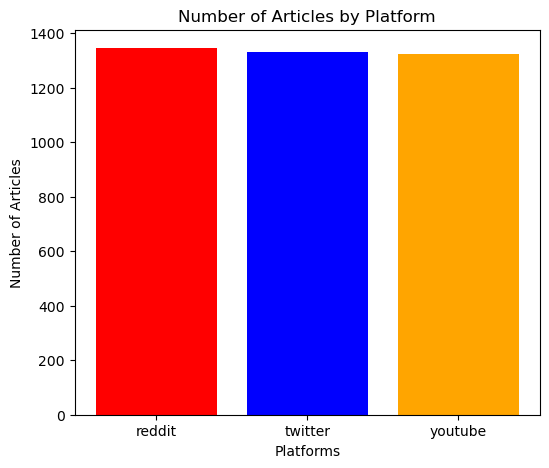

In [332]:
# Data visualization of platform vaiable.

platforms = ['reddit', 'twitter', 'youtube']
counts = [1346, 1331, 1323]

# Create a bar plot
plt.figure(figsize=(6, 5))
plt.bar(platforms, counts, color=['red', 'blue', 'orange'])
plt.xlabel('Platforms')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Platform')
plt.show()

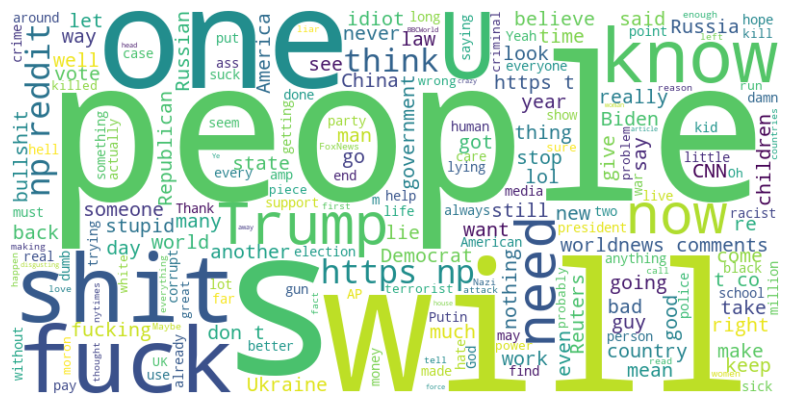

In [21]:
#Visualize the training data with wordcloud

# Combine all text into a single string
text_data = " ".join(df["text"].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#Data Pre-processing#

#Step 1:Tokenization 

nltk.download('punkt')  # Download necessary data for tokenization
token = []
# Tokenize each comment's text
for text in df["text"]:
    tokens = word_tokenize(text)  # Tokenize the text
    token.append(tokens) #make a list of tokenized data
print(token)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['WTF', ',', "y'all", 'never', 'made', 'MRE', 'fart', 'balloons', 'in', 'the', 'stumps', '?', 'Fucking', 'kids', 'these', 'days', '.'], ['No', 'apologies', '!', '!', 'McCall', 'has', 'balls', '!', 'Ccp', 'is', 'nothing', 'but', 'full', 'of', 'crap', '!', '!', '!'], ['What', 'ever', 'you', 'need', 'to', 'tell', 'yourself', 'to', 'sleep', 'at', 'night', 'you', 'fucking', 'retard', '.'], ['@', 'exZACKly', '@', 'CBSNews', 'Fuck', 'off', 'Nazi'], ['Texas', 'is', 'a', 'republican', 'sponsored', 'killing', 'ground', '.', 'All', 'they', 'teach', 'theselves', 'here', 'is', 'hatred', ',', 'racism', 'and', 'they', 'want', 'everyone', 'believing', 'what', 'they', 'believe', ',', 'by', 'force', 'if', 'necessary', '.', 'So', 'much', 'hatred', 'from', 'people', 'who', 'profess', 'being', 'religious', '.'], ['I', 'get', 'that', 'calling', 'the', 'rapporteur', 'a', '``', 'fake', 'job', "''", 'scores', 'points', 'with', 'his', 'base', ',', 'but', 'it', 'also', 'suggests', 'that', 'he', 'is', "n't", 'se

In [25]:
#Data Pre-processing#
# Step 2: Setmming

stem = []
porter_stemmer = PorterStemmer() # initialize Porter Stemmer
#stemming each tokenized text
for text in token:
    stemmed_words = [porter_stemmer.stem(word) for word in text]
    stem.append(stemmed_words) #make a list of stemmed data
print(stem)

[['wtf', ',', "y'all", 'never', 'made', 'mre', 'fart', 'balloon', 'in', 'the', 'stump', '?', 'fuck', 'kid', 'these', 'day', '.'], ['no', 'apolog', '!', '!', 'mccall', 'ha', 'ball', '!', 'ccp', 'is', 'noth', 'but', 'full', 'of', 'crap', '!', '!', '!'], ['what', 'ever', 'you', 'need', 'to', 'tell', 'yourself', 'to', 'sleep', 'at', 'night', 'you', 'fuck', 'retard', '.'], ['@', 'exzackli', '@', 'cbsnew', 'fuck', 'off', 'nazi'], ['texa', 'is', 'a', 'republican', 'sponsor', 'kill', 'ground', '.', 'all', 'they', 'teach', 'theselv', 'here', 'is', 'hatr', ',', 'racism', 'and', 'they', 'want', 'everyon', 'believ', 'what', 'they', 'believ', ',', 'by', 'forc', 'if', 'necessari', '.', 'so', 'much', 'hatr', 'from', 'peopl', 'who', 'profess', 'be', 'religi', '.'], ['i', 'get', 'that', 'call', 'the', 'rapporteur', 'a', '``', 'fake', 'job', "''", 'score', 'point', 'with', 'hi', 'base', ',', 'but', 'it', 'also', 'suggest', 'that', 'he', 'is', "n't", 'seriou', 'about', 'hi', 'own', 'foreign', 'interfer',

In [27]:
#Data Pre-processing#
#Step 3: Lemmatization

nltk.download('wordnet') # Download necessary data for lemmatization
lemma = []
lemmatizer = WordNetLemmatizer()
#lemmatizing stemmed data
for stemmed_data in stem:
    lemmatized_data = [lemmatizer.lemmatize(word) for word in stemmed_data]
    lemma.append(lemmatized_data) #make a list of lemmatized data
print(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['wtf', ',', "y'all", 'never', 'made', 'mre', 'fart', 'balloon', 'in', 'the', 'stump', '?', 'fuck', 'kid', 'these', 'day', '.'], ['no', 'apolog', '!', '!', 'mccall', 'ha', 'ball', '!', 'ccp', 'is', 'noth', 'but', 'full', 'of', 'crap', '!', '!', '!'], ['what', 'ever', 'you', 'need', 'to', 'tell', 'yourself', 'to', 'sleep', 'at', 'night', 'you', 'fuck', 'retard', '.'], ['@', 'exzackli', '@', 'cbsnew', 'fuck', 'off', 'nazi'], ['texa', 'is', 'a', 'republican', 'sponsor', 'kill', 'ground', '.', 'all', 'they', 'teach', 'theselv', 'here', 'is', 'hatr', ',', 'racism', 'and', 'they', 'want', 'everyon', 'believ', 'what', 'they', 'believ', ',', 'by', 'forc', 'if', 'necessari', '.', 'so', 'much', 'hatr', 'from', 'peopl', 'who', 'profess', 'be', 'religi', '.'], ['i', 'get', 'that', 'call', 'the', 'rapporteur', 'a', '``', 'fake', 'job', "''", 'score', 'point', 'with', 'hi', 'base', ',', 'but', 'it', 'also', 'suggest', 'that', 'he', 'is', "n't", 'seriou', 'about', 'hi', 'own', 'foreign', 'interfer',

In [31]:
#Data Pre-processing#
#Step 4: Stopwords

nltk.download('stopwords') # Download necessary data for stopwords
stop_words = set(stopwords.words('english')) #erase unnecessary words in english dictionary.
stopped = []

#Stopword of lemmatized data
for lemmatized_text in lemma:
    filtered = []
    for words in lemmatized_text:
        if (words not in stop_words):
            filtered.append(words)
    stopped.append(filtered) #make a list of stopped data
print(stopped)

[['wtf', ',', "y'all", 'never', 'made', 'mre', 'fart', 'balloon', 'stump', '?', 'fuck', 'kid', 'day', '.'], ['apolog', '!', '!', 'mccall', 'ha', 'ball', '!', 'ccp', 'noth', 'full', 'crap', '!', '!', '!'], ['ever', 'need', 'tell', 'sleep', 'night', 'fuck', 'retard', '.'], ['@', 'exzackli', '@', 'cbsnew', 'fuck', 'nazi'], ['texa', 'republican', 'sponsor', 'kill', 'ground', '.', 'teach', 'theselv', 'hatr', ',', 'racism', 'want', 'everyon', 'believ', 'believ', ',', 'forc', 'necessari', '.', 'much', 'hatr', 'peopl', 'profess', 'religi', '.'], ['get', 'call', 'rapporteur', '``', 'fake', 'job', "''", 'score', 'point', 'hi', 'base', ',', 'also', 'suggest', "n't", 'seriou', 'hi', 'foreign', 'interfer', 'alleg', '.'], ['ok', ',', 'peopl', 'get', 'arrest', 'lie', '?', 'made', 'bullshit', 'becaus', '.', 'hillari', 'trashi', '.'], ['@', 'noon4', '@', 'andrewjakemiii', '@', 'ap', '@', 'elonmusk', 'maga', 'moron', 'use', 'term', 'anyth', '’', 'agre', '.', '’', 'brainwash', '.', '’', 'actual', 'know',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
#Saving cleaned data into dataframe
df["text"] = stopped #cleaned data in text column
df.head() #reading first four input in the cleaned data. 

text  \
0  [wtf, ,, y'all, never, made, mre, fart, balloo...   
1  [apolog, !, !, mccall, ha, ball, !, ccp, noth,...   
2  [ever, need, tell, sleep, night, fuck, retard, .]   
3               [@, exzackli, @, cbsnew, fuck, nazi]   
4  [texa, republican, sponsor, kill, ground, ., t...   

                                      parent_comment  \
0                                               None   
1                                               None   
2  I wonder how many undercover agents will be go...   
3  @NCmylo @CBSNews Lol.  Stop choosing to be an ...   
4                                               None   

                                       article_title  \
0  Triangular UFO hovers over California military...   
1  China sentences elderly US citizen to life in ...   
2  Jan. 6 defendant who put foot on desk in Pelos...   
3  19-year-old Missouri man arrested in U-Haul cr...   
4  At Least 8 Killed After Driver Plows Car Into ...   

                                         article_url platform  \
0  https://www.dailymail.co.uk/news/article-12112...   reddit   
1  https://www.cnn.com/2023/05/15/china/china-jai...  youtube   
2  https://www.cbsnews.com/news/richard-barnett-j...  youtube   
3  https://www.cbsnews.com/news/u-haul-crash-lafa...  twitter   
4  https://www.nytimes.com/2023/05/07/us/car-pede...  youtube   

                                         platform_id  \
0                                            jlcm021   
1                         Ugws8gNW7eJyE9VHeM14AaABAg   
2  UgxHlqwNcVssLHUr4yF4AaABAg.9q7kOunSlu-9q7lHH4he6S   
3                                1661025155047637000   
4                         UgwpAfn9RIV0cHfhp4R4AaABAg   

                                     composite_toxic  
0  [[False, 74], [True, 323], [False, 1028], [Fal...  
1  [[False, 216], [False, 197], [False, 1039], [F...  
2  [[True, 192], [True, 193], [True, 260], [True,...  
3  [[True, 92], [False, 218], [True, 69], [True, ...  
4  [[False, 56], [True, 207], [False, 218], [Fals...

In [35]:
#save dataframe to csv file
df.to_csv('Training 1.csv')

In [299]:
##TEST DATA**

In [39]:
#reading test data

file_path = 'test.json'

data = []
with open(file_path, 'r') as file:
    for line in file:
        try:
            json_data = json.loads(line)
            data.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

test = pd.DataFrame(data)

if test is not None:
    print("Loaded DataFrame:")
    print(test.head())
else:
    print("DataFrame not loaded due to an error.")

Loaded DataFrame:
                                                text  \
0                                Ukrainian Bullshit.   
1  @LibDems No one likes you.\nYou denied democra...   
2  @EPurpera @BBCNews POS terrorist dictator Putr...   
3  @howardfineman @darkblue714 Bullshit. CNN set ...   
4  The war will be won by who "wins" the race bet...   

                                      parent_comment  \
0                               Russian   Propaganda   
1                                               None   
2              @BBCNews They should make peace talk.   
3                                               None   
4  What is the pope gonna do? Pray and throw a co...   

                                       article_title  \
0  Kremlin drone: Zelensky denies Ukraine attacke...   
1  UK economy shrank 0.3% in March, ONS figures show   
2  Ukraine war: Kyiv hit by new massive Russian d...   
3  Opinion | Why CNN's Trump town hall was always...   
4  Zelenskyy to meet with Po

In [41]:
#summery of dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            500 non-null    object
 1   parent_comment  166 non-null    object
 2   article_title   500 non-null    object
 3   article_url     500 non-null    object
 4   platform        500 non-null    object
 5   platform_id     500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [43]:
test.head()

text  \
0                                Ukrainian Bullshit.   
1  @LibDems No one likes you.\nYou denied democra...   
2  @EPurpera @BBCNews POS terrorist dictator Putr...   
3  @howardfineman @darkblue714 Bullshit. CNN set ...   
4  The war will be won by who "wins" the race bet...   

                                      parent_comment  \
0                               Russian   Propaganda   
1                                               None   
2              @BBCNews They should make peace talk.   
3                                               None   
4  What is the pope gonna do? Pray and throw a co...   

                                       article_title  \
0  Kremlin drone: Zelensky denies Ukraine attacke...   
1  UK economy shrank 0.3% in March, ONS figures show   
2  Ukraine war: Kyiv hit by new massive Russian d...   
3  Opinion | Why CNN's Trump town hall was always...   
4  Zelenskyy to meet with Pope Francis at Vatican...   

                                         article_url platform  \
0     https://www.bbc.com/news/world-europe-65471904  youtube   
1  https://news.sky.com/story/uk-economy-shrank-0...  twitter   
2            https://www.bbc.com/news/world-65736730  twitter   
3  https://www.msnbc.com/opinion/msnbc-opinion/cn...  twitter   
4  https://apnews.com/article/zelenskyy-italy-vis...   reddit   

                                         platform_id  
0  UgxjV6HRpnD6FUmw8aV4AaABAg.9pH-CgX5yEH9pH7BMIfAz5  
1                                1657052099564150784  
2                                1662672469205958656  
3                                1656508255454019587  
4                                            jk1pm1m

In [51]:
#find counts in platforms of test data
test['platform'].value_counts()

platform
youtube    177
twitter    169
reddit     154
Name: count, dtype: int64

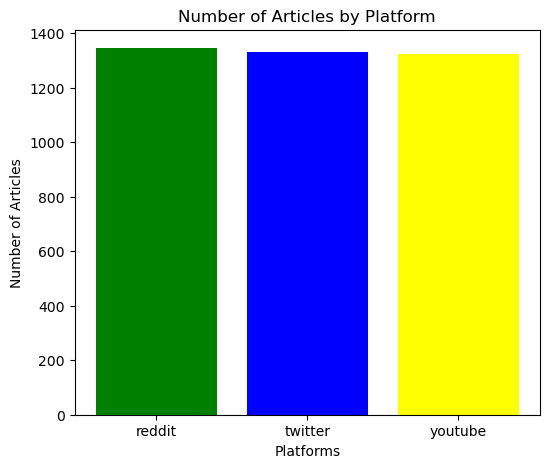

In [55]:
#find bard diagram
platforms = ['reddit', 'twitter', 'youtube']
counts = [1346, 1331, 1323]
plt.figure(figsize=(6, 5))
plt.bar(platforms, counts, color=['green', 'blue', 'yellow'])
plt.xlabel('Platforms')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Platform')
plt.show()

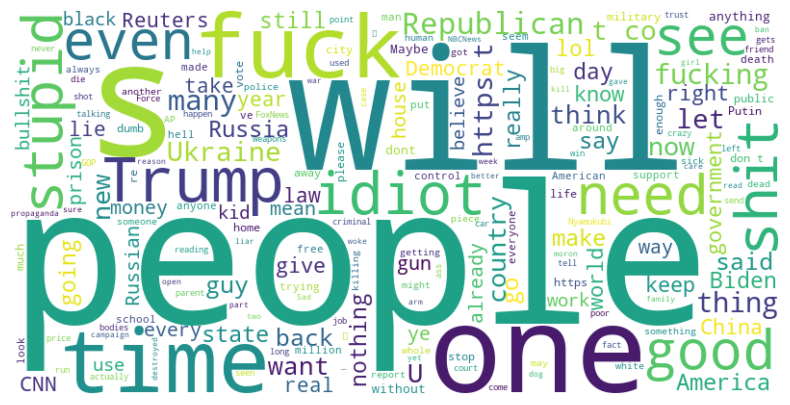

In [57]:
#Visualize the training data with wordcloud

# Combine all text into a single string
text_data = " ".join(test["text"].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
#run training model on test data

cleared = [] #first three steps in an empty list called cleared

for values in test["text"]:
    
    #Tokenizing text data
    tokens = word_tokenize(values) 
    
    #Stemming text data
    stemmed_words = [porter_stemmer.stem(word) for word in tokens]
    
    #Lemmatizing text data
    lemmatized_data = [lemmatizer.lemmatize(word) for word in stemmed_words]

    cleared.append(lemmatized_data) #list lemmatized data


cleared_test = [] #stoppword lemmatized data in an empty list called cleared_test

for lemmatized_text in cleared:
    
    filtered = [] #create filtered list from cleared list under cleared_test list
    for words in lemmatized_text:
        if (words not in stop_words):
            filtered.append(words)
    cleared_test.append(filtered)

test["text"] = cleared_test #runt filtered text of cleared_test list

In [ ]:
#Prediction of Composite toxic level

In [64]:
#make binary prediction of composit_toxic data labeled by human annotations.

binary = [] #make binary list

for item in df["composite_toxic"]: #predict composite_toxic from training data
    t = 0
    f = 0
    for prediction in item:
        if prediction[0]:
            t = t + prediction[1]
        else:
            f = f + prediction[1]

    if(t > f):
        binary.append(1) 
    else:
        binary.append(0)
        
#1,t= true
#0,f= false

df['composite_toxic_binary'] = binary #name binary as composite_toxtic_binary

# Check the first few values to ensure proper parsing
df['composite_toxic_binary'].value_counts()



composite_toxic_binary
0    2914
1    1086
Name: count, dtype: int64

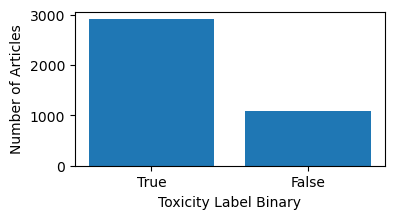

In [66]:
# Data visualization of composite_toxic_binary

platforms = ['True', 'False']
counts = [2914, 1086]

# Create a bar plot
plt.figure(figsize=(4, 2))
plt.bar(platforms, counts)
plt.xlabel('Toxicity Label Binary')
plt.ylabel('Number of Articles')
plt.show()

In [68]:
# Split data into features (X) and target (y)
X = df['text'].astype(str)  # Convert the 'text' column to string
y = df['composite_toxic_binary']

# Split the data into training and validation sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Training Model

In [70]:
# Create three machine learning pipelines with TF-IDF vectorizer, RandomForestClassifier and logistic Regression model

pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500)),
    ('clf', RandomForestClassifier(n_estimators=50, random_state=84))])

pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500)),
    ('svc', SVC(random_state=42))])

pipeline3 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500)),
    ('lr', LogisticRegression(random_state=1000))])

# Train the model
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = pipeline1.predict(X_test)
y_pred2 = pipeline2.predict(X_test)
y_pred3 = pipeline3.predict(X_test)

# Evaluate the model
report1 = classification_report(y_test, y_pred1)
report2 = classification_report(y_test, y_pred2)
report3 = classification_report(y_test, y_pred3)

print(report1)
print(report2)
print(report3)

              precision    recall  f1-score   support

           0       0.74      0.90      0.82       578
           1       0.43      0.19      0.26       222

    accuracy                           0.71       800
   macro avg       0.59      0.55      0.54       800
weighted avg       0.66      0.71      0.66       800

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       578
           1       0.53      0.14      0.22       222

    accuracy                           0.73       800
   macro avg       0.64      0.55      0.53       800
weighted avg       0.68      0.73      0.66       800

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       578
           1       0.54      0.17      0.26       222

    accuracy                           0.73       800
   macro avg       0.64      0.56      0.55       800
weighted avg       0.69      0.73      0.67       800



In [78]:
#corss validation

# Perform cross-validation for pipeline1, pipeline2, pipeline3
cv_scores1 = cross_val_score(pipeline1, X_train, y_train, cv=5)
cv_scores2 = cross_val_score(pipeline2, X_train, y_train, cv=5)
cv_scores3 = cross_val_score(pipeline3, X_train, y_train, cv=5)


print("Cross-validation scores for pipeline1 (Random Forest):", cv_scores1)
print("Mean accuracy for pipeline1:", cv_scores1.mean())
print("\nCross-validation scores for pipeline2 (SVC):", cv_scores2)
print("Mean accuracy for pipeline2:", cv_scores2.mean())
print("\nCross-validation scores for pipeline3 (Logistic Regression):", cv_scores3)
print("Mean accuracy for pipeline3:", cv_scores3.mean())

Cross-validation scores for pipeline1 (Random Forest): [0.7125    0.690625  0.7390625 0.7359375 0.715625 ]
Mean accuracy for pipeline1: 0.71875

Cross-validation scores for pipeline2 (SVC): [0.7359375 0.715625  0.753125  0.7484375 0.7296875]
Mean accuracy for pipeline2: 0.7365625000000001

Cross-validation scores for pipeline3 (Logistic Regression): [0.7484375 0.73125   0.75      0.753125  0.734375 ]
Mean accuracy for pipeline3: 0.7434375


In [80]:
#Prediction and final model selection on test.json data
test_data = test["text"].astype(str)
y_pred_real = pipeline3.predict(test_data)

len(y_pred_real)

500

In [82]:
#import csv file that has two columns: platform_id, prediction

import csv

y_label = []
for i in y_pred_real:
    if i == 1:
        y_label.append("True")
    else:
        y_label.append("False")

test["platform_id"] = test["platform_id"].astype(str)

test["prediction"] = y_label

df_to_save = test[["platform_id","prediction"]]

print(df_to_save)

# measure total leght of object
len(df_to_save)

                                           platform_id prediction
0    UgxjV6HRpnD6FUmw8aV4AaABAg.9pH-CgX5yEH9pH7BMIfAz5      False
1                                  1657052099564150784      False
2                                  1662672469205958656      False
3                                  1656508255454019587      False
4                                              jk1pm1m      False
..                                                 ...        ...
495                         UgwitXUJxcPlN3AgqSZ4AaABAg      False
496                                1663308218406252547      False
497                                1654293821251829760      False
498                                            jl3p4n3      False
499                                            jm4mz90      False

[500 rows x 2 columns]


500

In [84]:
#save csv file as predictions
df_to_save.to_csv('Model predictions.csv')